# CAB420 Assignment 1A Question 3: Template and Utilities Demo
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a quick demo and overview of the provided utility functions to help with Assignment 1A, Question 3.

It also implements the SVM that you are to compare against when responsing to the question.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

## Utility Functions

The following cell contains utility functions to:
* Load the data
* Vectorise the data
* Plot images
* Resize all images
* Convert images to grayscale

These are provided to assist you in developing your solution.

In [2]:
#
# Utility functions for CAB420, Assignment 1A, Q3
# Author: Simon Denman (s.denman@qut.edu.au)
#

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from scipy.io import loadmat        # to load mat files
import matplotlib.pyplot as plt     # for plotting
import numpy as np                  # for reshaping, array manipulation
import cv2                          # for colour conversion
import tensorflow as tf             # for bulk image resize
import keras
from keras import layers
import pydot

# Load data for Q3
#  train_path: path to training data mat file
#  test_path:  path to testing data mat file
#
#  returns:    arrays for training and testing X and Y data
#
def load_data(train_path, test_path):

    # load files
    train = loadmat(train_path)
    test = loadmat(test_path)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    train_X = np.transpose(train['train_X'], (3, 0, 1, 2)) / 255.0
    train_Y = train['train_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    train_Y[train_Y == 10] = 0
    train_Y = np.reshape(train_Y, -1)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    test_X = np.transpose(test['test_X'], (3, 0, 1, 2)) / 255.0
    test_Y = test['test_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    test_Y[test_Y == 10] = 0
    test_Y = np.reshape(test_Y, -1)

    # return loaded data
    return train_X, train_Y, test_X, test_Y

# vectorise an array of images, such that the shape is changed from {samples, width, height, channels} to
# (samples, width * height * channels)
#   images: array of images to vectorise
#
#   returns: vectorised array of images
#
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

# Plot some images and their labels. Will plot the first 100 samples in a 10x10 grid
#  x: array of images, of shape (samples, width, height, channels)
#  y: labels of the images
#
def plot_images(x, y):
    fig = plt.figure(figsize=[15, 18])
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1)
        ax.imshow(x[i,:])
        ax.set_title(y[i])
        ax.axis('off')

# Resize an array of images
#  images:   array of images, of shape (samples, width, height, channels)
#  new_size: tuple of the new size, (new_width, new_height)
#
#  returns:  resized array of images, (samples, new_width, new_height, channels)
#
def resize(images, new_size):
    # tensorflow has an image resize funtion that can do this in bulk
    # note the conversion back to numpy after the resize
    return tf.image.resize(images, new_size).numpy()
          
# Convert images to grayscale
#   images:  array of colour images to convert, of size (samples, width, height, 3)
#
#   returns: array of converted images, of size (samples, width, height, 1)
#
def convert_to_grayscale(images):
    # storage for converted images
    gray = []
    # loop through images
    for i in range(len(images)):
        # convert each image using openCV
        gray.append(cv2.cvtColor(images[i,:], cv2.COLOR_BGR2GRAY))
    # pack converted list as an array and return
    return np.expand_dims(np.array(gray), axis = -1)

## Utility Function Demonstration

The following presents a brief demonstration of the utility functions. These portions of code do not form part of the template, or solution, and could be commented out/removed.

### Data Loading

Load the data, and visualise images.

(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)


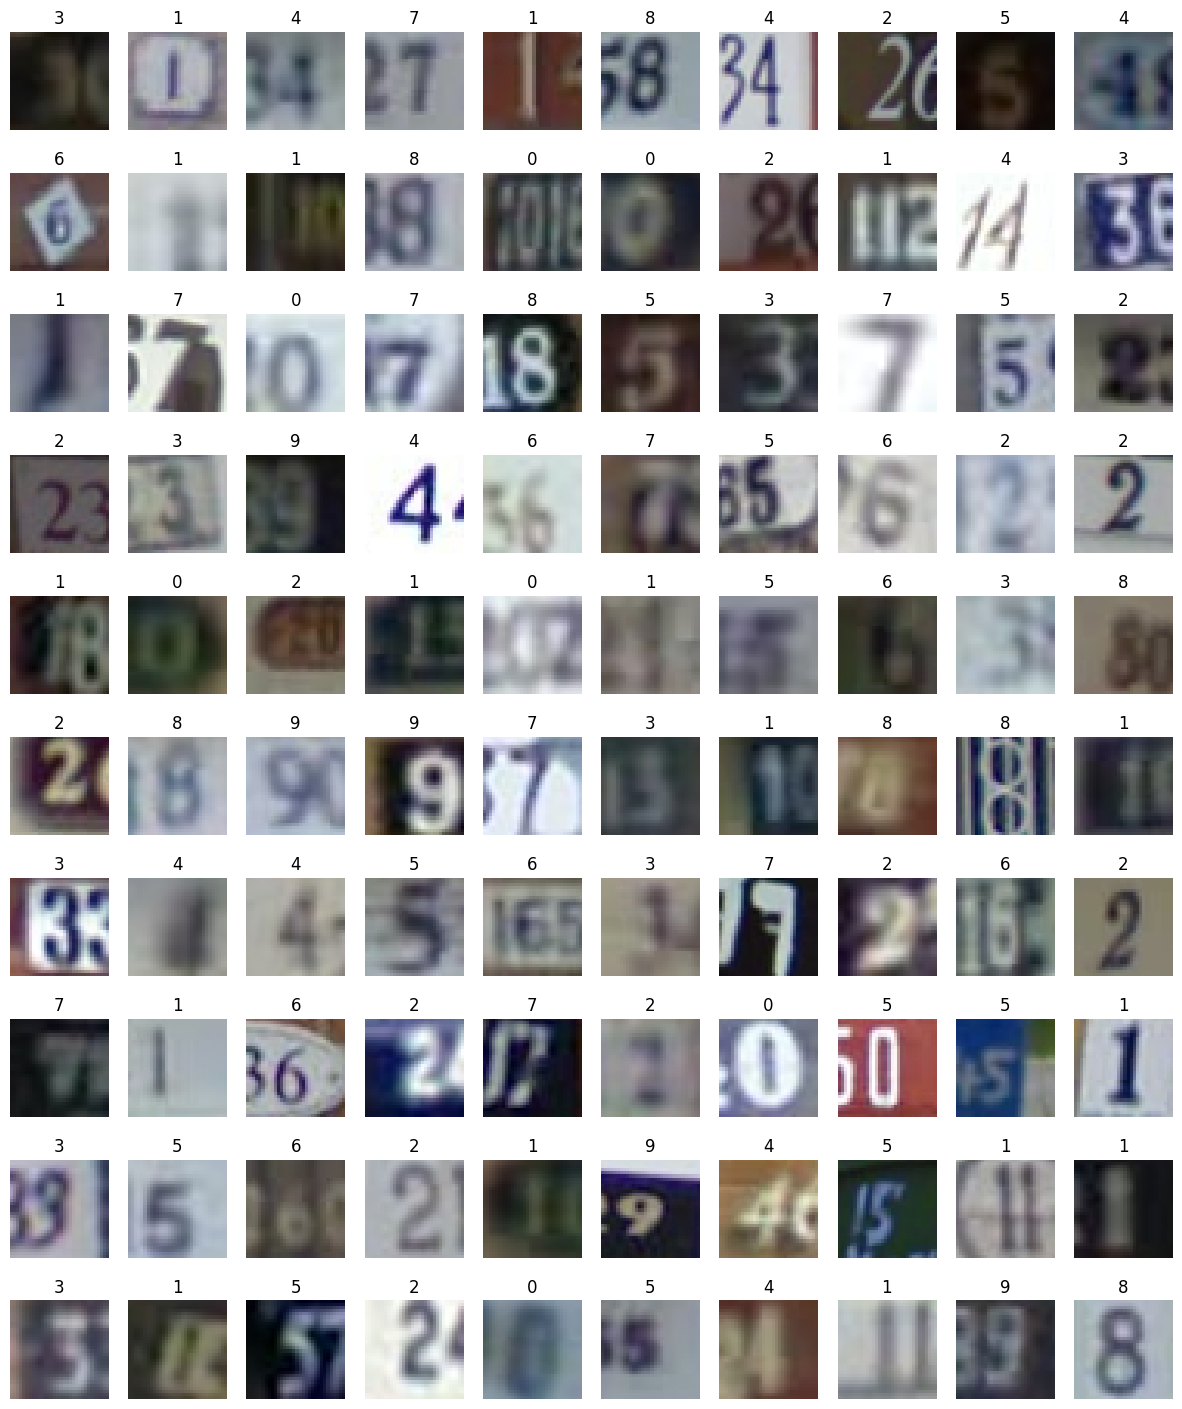

In [3]:
train_X, train_Y, test_X, test_Y = load_data('Data/Q3/q3_train.mat', 'Data/Q3/q3_test.mat')

# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
plot_images(train_X, train_Y)

### Vectorise Data

To train an SVM, each sample needs to be a vector rather than an image.

In [4]:
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(test_vector_X.shape)

(1000, 3072)
(10000, 3072)


### Conversion and Resizing

You may wish to either:
* Resize images
* Convert images to grayscale

Two functions are provided to do this, and can be used in combination as shown below.

(1000, 20, 20, 1)


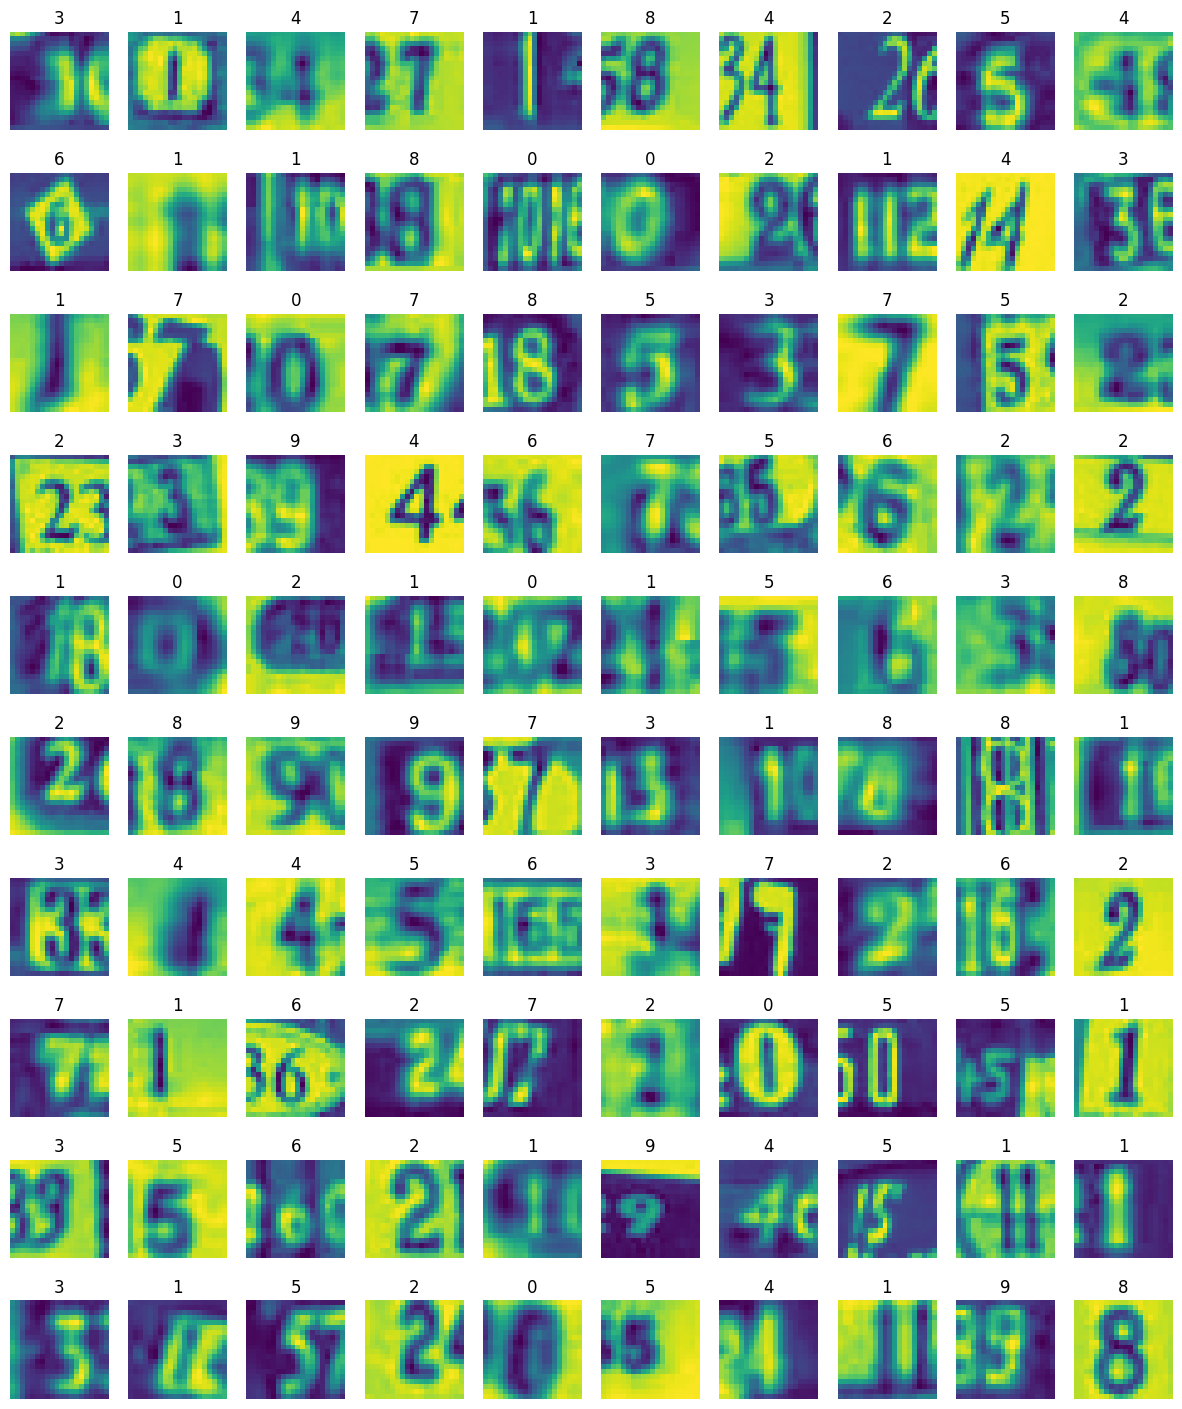

In [5]:
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))
print(train_X_small.shape)
plot_images(train_X_small, train_Y)

### Measuring Time

There are a lot of ways to measure time in python. A simple one is to use ``process_time`` within the ``time`` package. This will simply measure the ellapsed process time in seconds. We can use ths to measure individual parts of our code as follows:

In [6]:
# import process_time
from time import process_time

# get a start time
time_1 = process_time()

# do some stuff, in this case we'll just load some data
train_X, train_Y, test_X, test_Y = load_data('Data/Q3/q3_train.mat', 'Data/Q3/q3_test.mat')

# get the end time of our first lot of "stuff"
time_2 = process_time()

# do some other stuff
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))

# get the end time of our first lot of "stuff"
time_3 = process_time()

# the time it took to do "our stuff" is just the difference between the start and end times
print('Time to load data:   %f seconds' % (time_2 - time_1))
print('Time to resize data: %f seconds' % (time_3 - time_2))

Time to load data:   0.171875 seconds
Time to resize data: 0.031250 seconds


## Question 3 Template

The following provides a starting point for your solution. It trains the SVM that you are to compare your trained DCNNs against, and measures the time taken to train this SVM, and to perform inference with the train and test sets.

This does not measure the performance of the SVM - you will need to implement this as part of your solution.

In [7]:
from sklearn.svm import SVC
from time import process_time

# load data
train_X, train_Y, test_X, test_Y = load_data('Data/Q3/q3_train.mat', 'Data/Q3/q3_test.mat')

# you may want to split the data to obtain a validation set. This is not needed, but if you wish to you would do
# this here

# any resize, colour change, etc, would go here

# Convert RGB images to grayscale
train_X_gray = np.dot(train_X[..., :3], [0.2989, 0.5870, 0.1140])

# Reshape grayscale images to match the expected input shape of the model
train_X_gray = train_X_gray.reshape(train_X_gray.shape + (1,))

# Convert RGB images to grayscale
test_X_gray = np.dot(test_X[..., :3], [0.2989, 0.5870, 0.1140])

# Reshape grayscale images to match the expected input shape of the model
test_X_gray = test_X_gray.reshape(test_X_gray.shape + (1,))

# vectorise data
# If you do any resize, reshape, etc of the data prior to putting this into your DCNN, change this code to 
# vectorise that verison of the data. The same data should be used by all models for a fair comparison; though
# you will only vectorise the data for the SVM (i.e. the DCNN will get the data as images).
train_vector_X = vectorise(train_X_gray)
test_vector_X = vectorise(test_X_gray)

# train the SVM
# measure the start time of training
svm_train_start = process_time()
# run the training - note that you don't need to change any parameters here except potentially for the input data is you 
# resize, change colour, etc
svm = SVC(C = 1.0, kernel = 'linear').fit(train_vector_X, train_Y)
# record the end time of the training
svm_train_end = process_time()
# predict on the training set
train_predictions = svm.predict(train_vector_X)
# measure of the time of the training set prediction
svm_train_pred_end = process_time()
# predict on the test set
test_predictions = svm.predict(test_vector_X)
# measure the end time on the prediction of the test set
svm_test_pred_end = process_time()

# check how long the SVM took to train
svm_train_time = svm_train_end - svm_train_start
# check how long the SVM took to perform inference on the training set
svm_inference_train_time = svm_train_pred_end - svm_train_end
# check how long the SVM took to perform inference on the testing set
svm_inference_test_time = svm_test_pred_end - svm_train_pred_end
# print some times
print('Training Time: %f\nInference Time (training set): %f\nInference Time (testing set): %f' % \
      (svm_train_time, svm_inference_train_time, svm_inference_test_time))

# evaluate SVM
# here you can insert whatever evaluation metrics you feel are appropriate, though F1 and a confusion matrix would be a fair
# option

Training Time: 0.578125
Inference Time (training set): 0.187500
Inference Time (testing set): 1.687500


In [8]:
# Really helpful function from CAB420_Classification_Example_2_Multi_Class_Classification.ipynb, with some minor modifications
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[20, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(f1_score(Y_train, pred, average='macro')));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(f1_score(Y_test, pred, average='macro')));

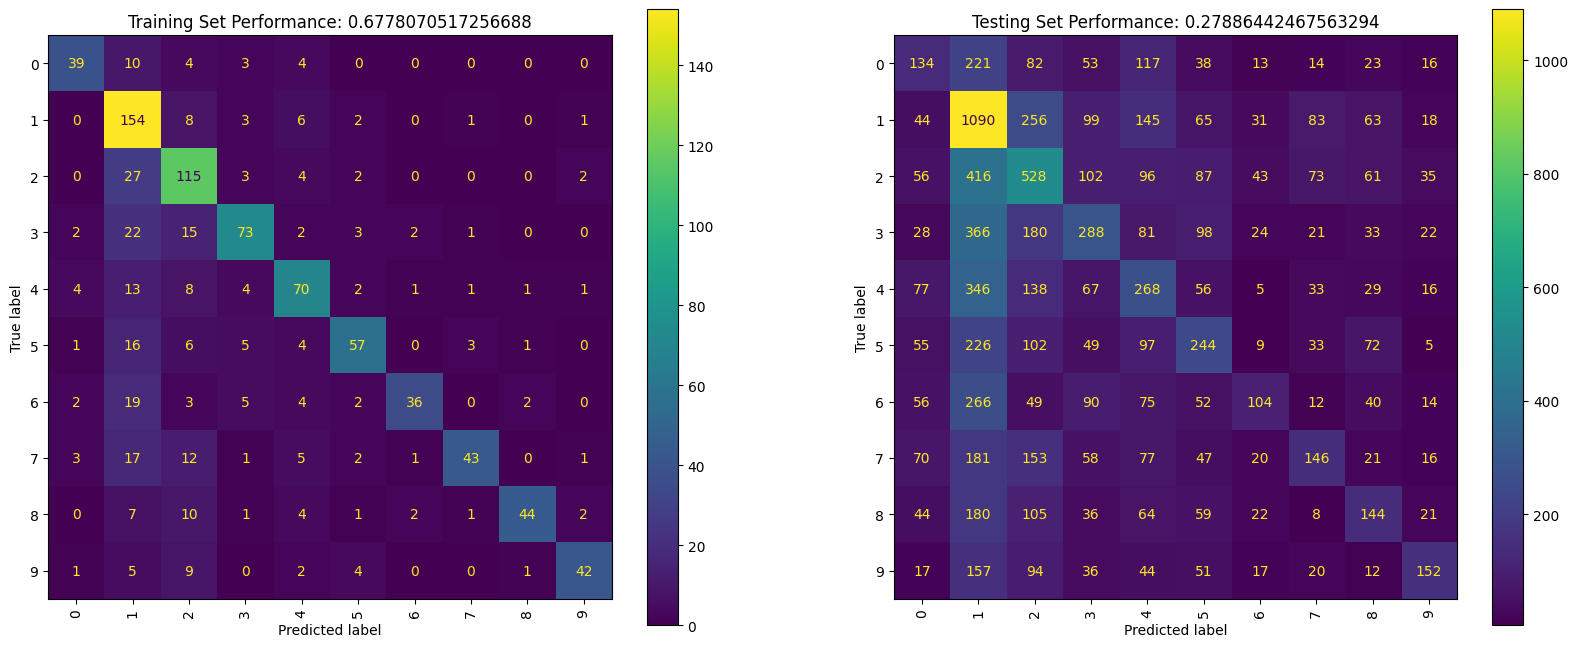

In [9]:
eval_model(svm, train_vector_X, train_Y, test_vector_X, test_Y)

In [10]:
# develop, evaluate and compare DCNNs
#
# You should create one DCNN which you will train from scratch, and then add augmentation to this and train it again.
# Use whatever augmentation you feel is appropraite.
#
# For your DCNN design, feel free to borrow networks from pracs and lecture examples. The network does not need to be
# overly complex, but you should briefly explain your selection of this model. You should avoid networks so simple 
# that they perform very badly. Look at the lecture notes and the sort of simple DCNNs we've created as a guide. With 
# respect to training time, there is no minimum or maximum training time, but you should either:
#  - Train both your models to convergence, noting that this may take different numbers of epochs
#  - Train your networks for the same period of time, ensuring that this time is sufficient for at least one to converge
# Keep in mind that with the very small training set, you may need to increase the number of epochs compared to what we
# see in the lecture examples

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from tensorflow.keras.models import Sequential

def plot_training(history):
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.set_title('Loss vs Epochs')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.set_title('Accuracy vs Epochs')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend();


def plot_confusion(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[20, 6])

    pred_train = np.argmax(model.predict(X_train), axis=1)  
    f1_train = f1_score(Y_train, pred_train, average='macro') 
    cm = confusion_matrix(Y_train, pred_train)
    ax = fig.add_subplot(1, 2, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=range(10))
    c.plot(ax = ax)
    ax.set_title(f'Training Performance (F1 Score {f1_train})')

    pred_test = np.argmax(model.predict(X_test), axis=1)  
    f1_test = f1_score(Y_test, pred_test, average='macro') 
    cm = confusion_matrix(Y_test, pred_test)
    ax = fig.add_subplot(1, 2, 2)
    c = ConfusionMatrixDisplay(cm, display_labels=range(10))
    c.plot(ax = ax)
    ax.set_title(f'Testing Performance (F1 Score {f1_test})')

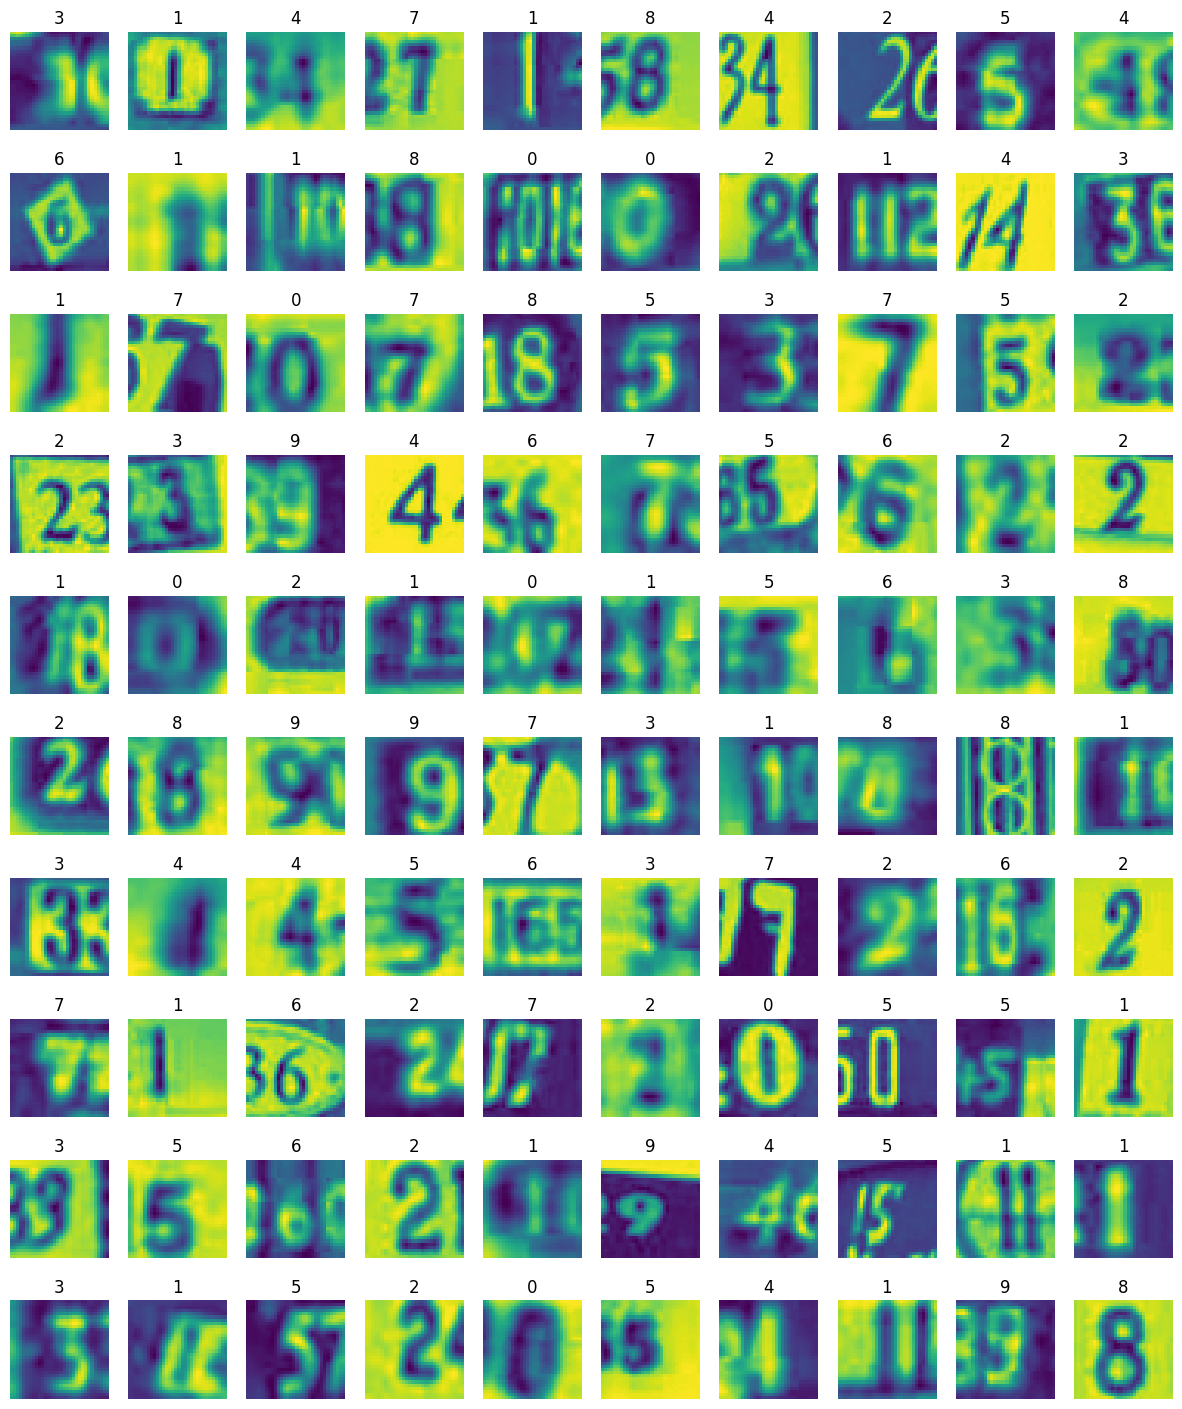

In [11]:
# Data Preparation

# Convert RGB images to grayscale
train_X_gray = np.dot(train_X[..., :3], [0.2989, 0.5870, 0.1140])

# Reshape grayscale images to match the expected input shape of the model
train_X_gray = train_X_gray.reshape(train_X_gray.shape + (1,))

# Normalize grayscale images
train_X_gray_normalized = train_X_gray.astype('float32') / 255.0

#plot_images(train_X_gray_normalized, train_Y)

# Convert RGB images to grayscale
test_X_gray = np.dot(test_X[..., :3], [0.2989, 0.5870, 0.1140])

# Reshape grayscale images to match the expected input shape of the model
test_X_gray = test_X_gray.reshape(test_X_gray.shape + (1,))

# Normalize grayscale images
test_X_gray_normalized = test_X_gray.astype('float32') / 255.0

# Data Augmentation
train_X_small = convert_to_grayscale(resize(train_X, (32, 32)))

test_X_small = convert_to_grayscale(resize(test_X, (32, 32)))

plot_images(train_X_gray, train_Y)

In [12]:
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, AveragePooling2D, Input, Flatten
from keras.regularizers import l2


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(inputs, filters, num_res_blocks, pool_size):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.

    # Arguments
        inputs (layer):         the input tensor
        filters ([int]):        number of filters in each stage, length of list determines number of stages
        num_res_blocks (int):   number of residual blocks per stage
        pool_size (int):        size of the average pooling at the end

    # Returns
        output after global average pooling and flatten, ready for output
    """
    x = resnet_layer(inputs=inputs,
                     num_filters=filters[0])

    # Instantiate the stack of residual units
    for stack, filters in enumerate(filters):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
 
    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=pool_size)(x)
    y = Flatten()(x)

    return y


def resnet_v2(inputs, filters, num_res_blocks, pool_size):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.

    # Arguments
        inputs (layer):         the input tensor
        filters ([int]):        number of filters in each stage, length of list determines number of stages
        num_res_blocks (int):   number of residual blocks per stage
        pool_size (int):        size of the average pooling at the end

    # Returns
        output after global average pooling and flatten, ready for output
    """

    x = resnet_layer(inputs=inputs,
                     num_filters=filters[0],
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage, filters in enumerate(filters):
        num_filters_in = filters
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=pool_size)(x)
    y = Flatten()(x)
    return y

In [25]:
#from keras.utils import plot_model
# Define the function to build the provided CNN model
#def build_cnn_model():
#    inputs = keras.Input(shape=(32, 32, 1,), name='img')
#    x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(inputs)
#    x = layers.BatchNormalization()(x)
#    x = layers.MaxPool2D(pool_size=(2, 2))(x)
#    x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(x)
#    x = layers.BatchNormalization()(x)
#    x = layers.MaxPool2D(pool_size=(2, 2))(x)
#    x = layers.Dropout(0.5)(x)  
#    x = layers.Flatten()(x)
#    x = layers.Dense(64, activation='relu')(x)
#    x = layers.Dropout(0.5)(x)
#    outputs = layers.Dense(10, activation='softmax')(x)

#    model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='svhn_digit_classifier_model')
    
#    return model_cnn

# Compile the provided CNN model
#cnn_model = build_cnn_model()
#cnn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
#                       metrics=['accuracy'], jit_compile=False)

resnet_compile_start = process_time()
inputs = Input(shape=(32, 32, 1, ), name='img')
x = resnet_v1(inputs, [16, 32], 1, 8)
output = Dense(10, activation='softmax')(x)
model_resnet_v1 = keras.Model(inputs=inputs, outputs=output, name='simple_resnet_v1')
model_resnet_v1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                       metrics=['accuracy'], jit_compile=False)

model_resnet_v1.save_weights('ResNetV1_network.weights.h5')
resnet_compile_end = process_time()

#plot_model(model_resnet_v1, show_shapes=True, dpi=80, show_layer_activations=True)

# Define the batch size and number of epochs
batch_size = 64
epochs = 200

# Define a model checkpoint
stoppoint = keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5
)


# Train the provided CNN model
history_resnet = model_resnet_v1.fit(train_X_gray, train_Y,
                                      batch_size=batch_size,
                                      epochs=epochs,
                                      callbacks=[stoppoint],
                                      validation_split=0.2)

resnet_history_end = process_time()

resnet_compiling_time = resnet_compile_end - resnet_compile_start
resnet_history_time = resnet_history_end - resnet_compile_end

print('ResNet V1 Compiling time: %f\nResNet V1 Training time: %f' % \
      (resnet_compiling_time, resnet_history_time))

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.1194 - loss: 2.5290 - val_accuracy: 0.1400 - val_loss: 2.3035
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1973 - loss: 2.2405 - val_accuracy: 0.0700 - val_loss: 2.3584
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2540 - loss: 2.1338 - val_accuracy: 0.1800 - val_loss: 2.3022
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2771 - loss: 2.0490 - val_accuracy: 0.1650 - val_loss: 2.2756
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3132 - loss: 1.9734 - val_accuracy: 0.1550 - val_loss: 2.2938
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3643 - loss: 1.8732 - val_accuracy: 0.1700 - val_loss: 2.3019
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3809 - loss: 1.7932 - val_accuracy: 0.1700 - val_loss: 2.3209
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4345 - loss: 1.6974 - val_accuracy: 0.

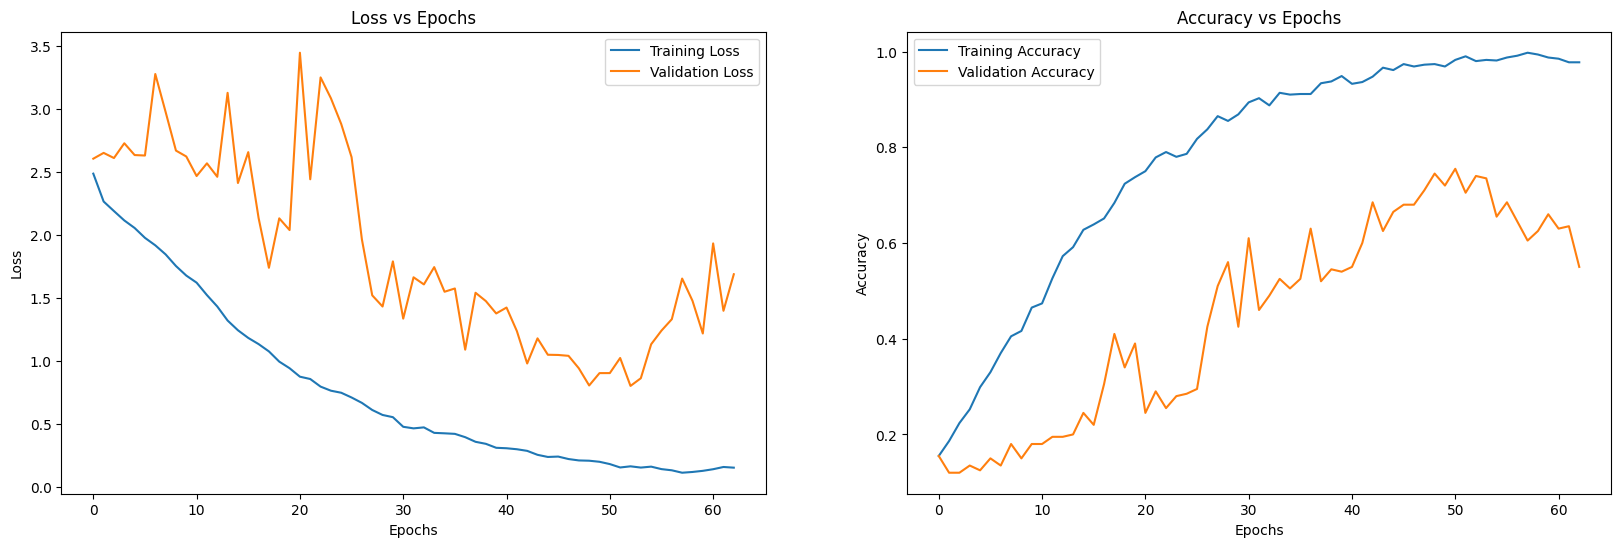

In [14]:
plot_training(history_resnet)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


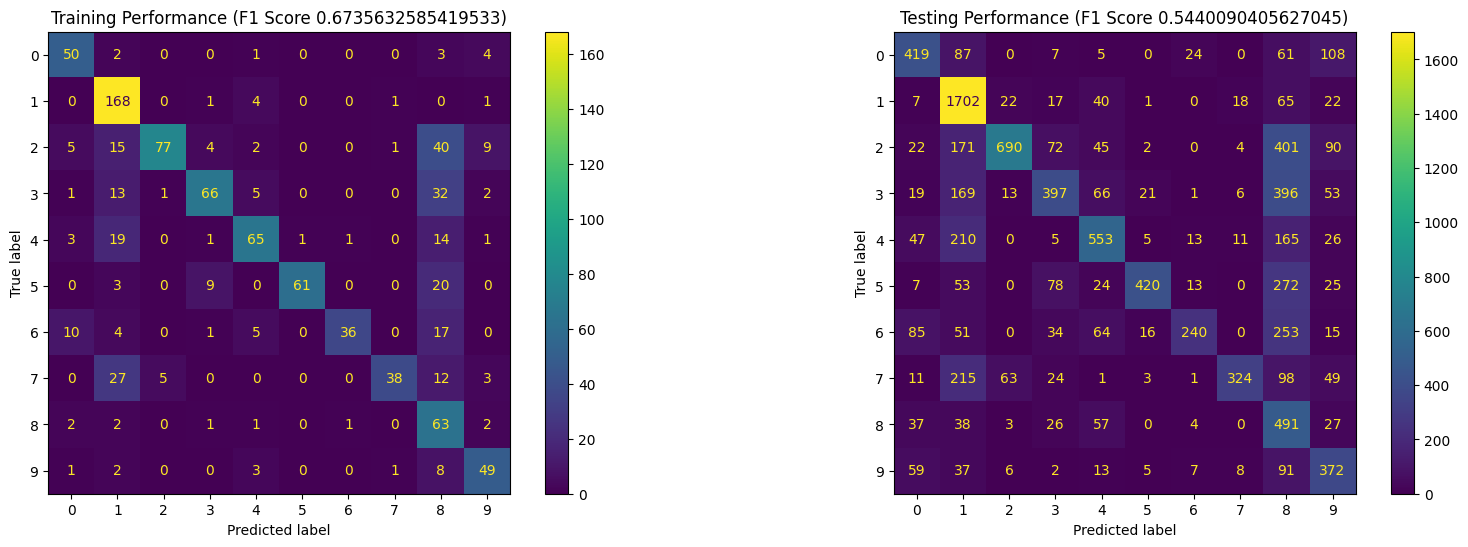

In [15]:
plot_confusion(model_resnet_v1, train_X_gray, train_Y, test_X_gray, test_Y)

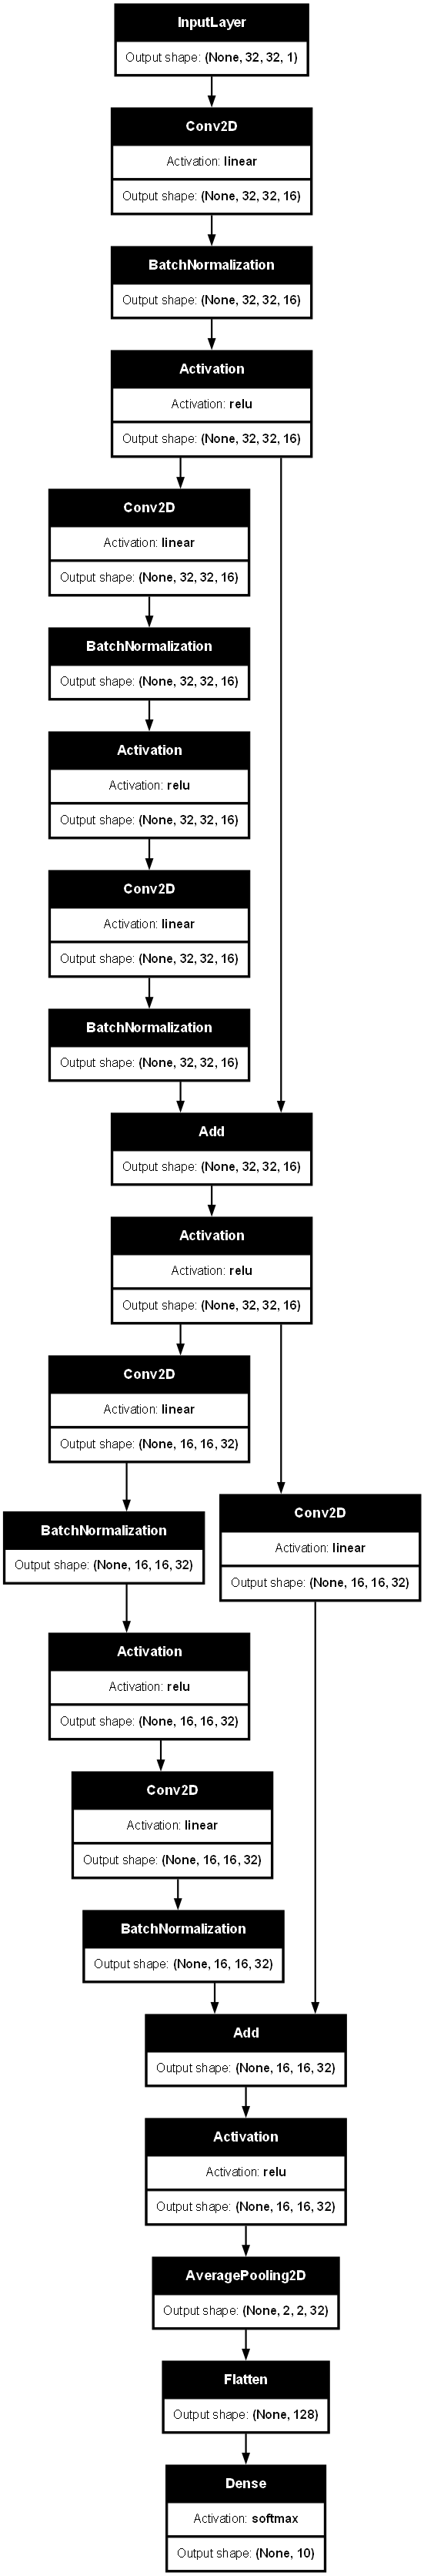

In [16]:
keras.utils.plot_model(model_resnet_v1, show_shapes=True, dpi=80, show_layer_activations=True)

(1000,)
(1000, 32, 32, 3)


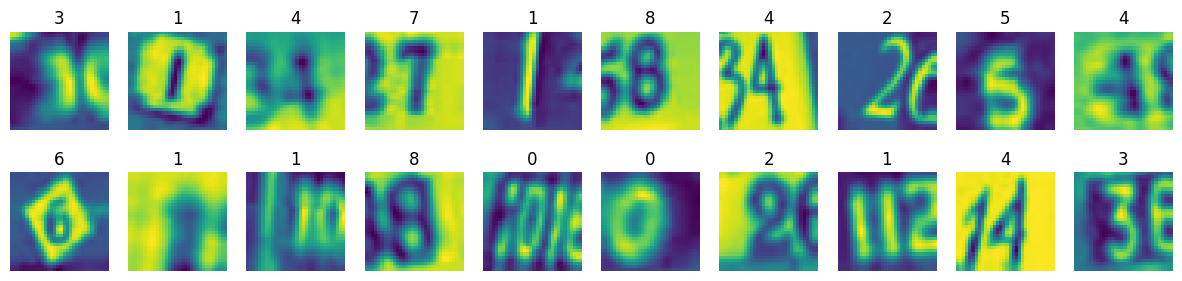

In [17]:
# Data Augmentation

#train_X = train_X[1::5, :, :, :]
#test_X = test_X[1::5, :, :, :]

#train_Y = train_Y[1::5, ]
#test_Y = test_Y[1::5, :]

#train_X_small = convert_to_grayscale(resize(train_X, (32, 32)))

#test_X_small = convert_to_grayscale(resize(test_X, (32, 32)))

print(np.shape(train_Y))

print(np.shape(train_X))

data_augmentation = keras.Sequential([
  #layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.025),
  layers.RandomZoom(0.025),
  layers.RandomTranslation(height_factor=(-0.025, 0.025), width_factor=(-0.025, 0.025))
])

fig = plt.figure(figsize=[15, 18])
for i in range(20):
    ax = fig.add_subplot(10, 10, i + 1)
    augmented_image = data_augmentation(keras.ops.expand_dims(train_X_gray[i,:,:,:],0))
    ax.imshow(augmented_image[0])
    ax.set_title(train_Y[i])
    ax.axis('off')

In [18]:
# Define the function to build the provided CNN model
#def build_augment_cnn_model():
#    inputs = keras.Input(shape=(32, 32, 1,), name='img')
#
#    # Apply data augmentation to inputs
#    augmented_inputs = data_augmentation(inputs)
#
#    x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(augmented_inputs)
#    x = layers.BatchNormalization()(x)
#    x = layers.MaxPool2D(pool_size=(2, 2))(x)
#    x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(x)
#    x = layers.BatchNormalization()(x)
#    x = layers.MaxPool2D(pool_size=(2, 2))(x)
#    x = layers.Dropout(0.5)(x)  
#    x = layers.Flatten()(x)
#    x = layers.Dense(64, activation='relu')(x)
#    x = layers.Dropout(0.5)(x)
#    outputs = layers.Dense(10, activation='softmax')(x)
#
#    model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='svhn_digit_classifier_model')
#    
#    return model_cnn

# Compile the provided CNN model
#cnn_augment_model = build_augment_cnn_model()
#cnn_augment_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
#                       metrics=['accuracy'], jit_compile=False)

# Augmented
# Define the batch size and number of epochs
resnet_compile_start = process_time()
augmented_inputs = data_augmentation(inputs)
x = resnet_v1(augmented_inputs, [16, 32], 1, 8) 
output = Dense(10, activation='softmax')(x) 
model_resnet_v1 = keras.Model(inputs=inputs, outputs=output, name='simple_resnet_v1')
#model_resnet_v1.load_weights('ResNetV1_network.weights.h5')
model_resnet_v1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                       metrics=['accuracy'],  jit_compile=False)

model_resnet_v1.save_weights('ResNetV1_network_augmented_inputs.weights.h5')
resnet_compile_end = process_time()

# Define the batch size and number of epochs
batch_size = 64
epochs = 200

# Define a model checkpoint
stoppoint = keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5
)

# Train the provided CNN model
history_resnet = model_resnet_v1.fit(train_X_gray, train_Y,
                                      batch_size=batch_size,
                                      epochs=epochs,
                                      callbacks=[stoppoint],
                                      validation_split=0.2)

resnet_history_end = process_time()

resnet_compiling_time = resnet_compile_end - resnet_compile_start
resnet_history_time = resnet_history_end - resnet_compile_end

print('ResNet V1 Compiling time: %f\nResNet V1 Training time: %f' % \
      (resnet_compiling_time, resnet_history_time))
#plot_training(history_provided, provided_model, test_X_gray_normalized, test_Y)



Epoch 1/200


c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.0949 - loss: 2.7009 - val_accuracy: 0.1300 - val_loss: 2.3239
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1868 - loss: 2.2340 - val_accuracy: 0.0600 - val_loss: 2.3402
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2157 - loss: 2.1384 - val_accuracy: 0.1850 - val_loss: 2.3177
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2856 - loss: 2.0781 - val_accuracy: 0.1950 - val_loss: 2.2621
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2931 - loss: 2.0018 - val_accuracy: 0.1650 - val_loss: 2.2273
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3373 - loss: 1.9739 - val_accuracy: 0.1800 - val_loss: 2.4388
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4146 - loss: 1.8027 - val_accuracy: 0.1950 - val_loss: 2.2046
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4397 - loss: 1.7584 - val_accuracy: 0.2150 - val_l

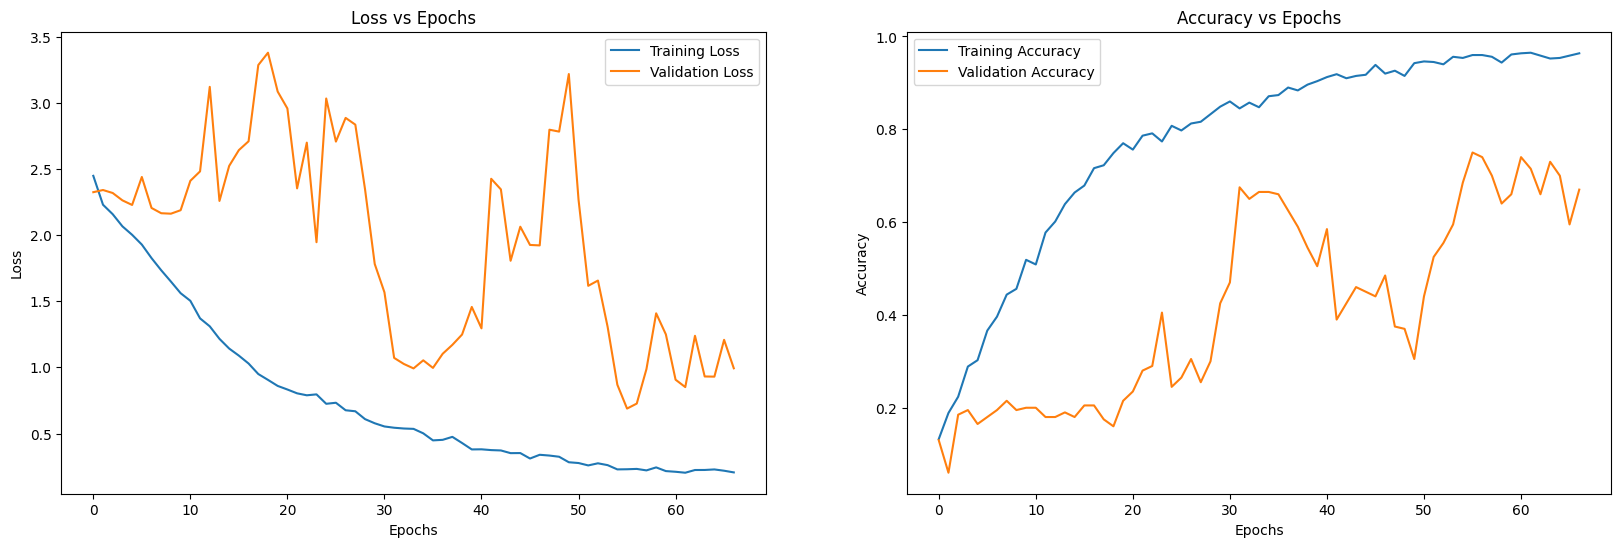

In [19]:
plot_training(history_resnet)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


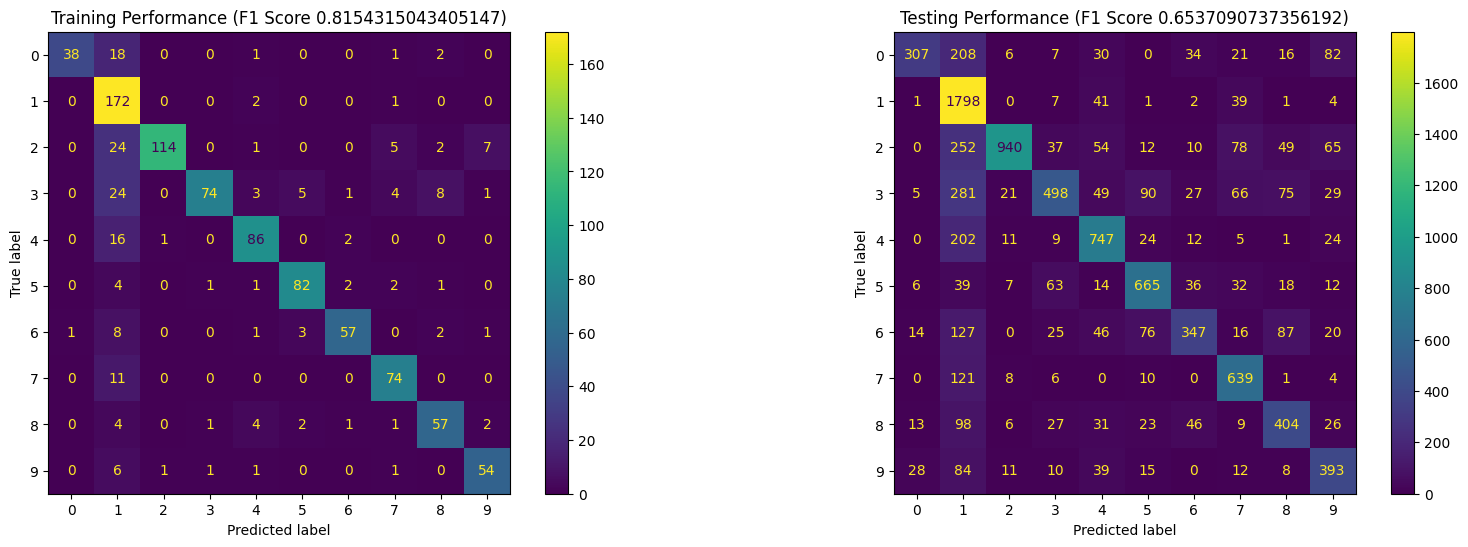

In [20]:
plot_confusion(model_resnet_v1 , train_X_small, train_Y, test_X_gray, test_Y)

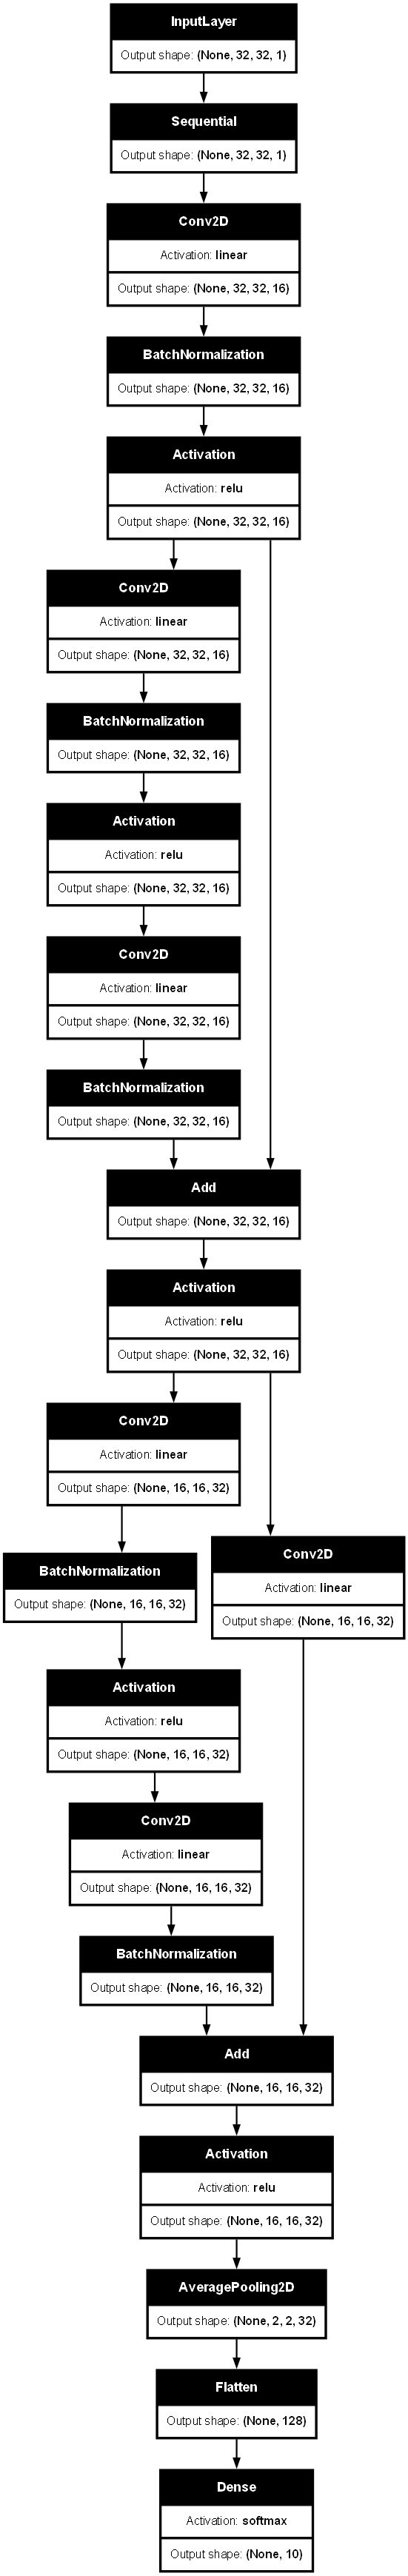

In [21]:
keras.utils.plot_model(model_resnet_v1, show_shapes=True, dpi=80, show_layer_activations=True)

In [22]:
# For your write-up, you should include:
# - briefly mention any pre-processing you did and why
# - outline your network design, and training approach. The discussion of training should note how long the model was trained
#   for, and if it converged. If you observe the non-augmented and augmented networks training at different rates, discuss that
#   here
# - outline your data augmentation, and briefly justify why these methods were chosen.
# - an evaluation and comparison of three models, which should highlight any differences observed between the models, and the
#   inference time of the three models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT